# Statement

The Sure Tomorrow insurance company wants to solve several tasks with the help of Machine Learning and you are asked to evaluate that possibility.

- Task 1: Find customers who are similar to a given customer. This will help the company's agents with marketing.
- Task 2: Predict whether a new customer is likely to receive an insurance benefit. Can a prediction model do better than a dummy model?
- Task 3: Predict the number of insurance benefits a new customer is likely to receive using a linear regression model.
- Task 4: Protect clients' personal data without breaking the model from the previous task. It's necessary to develop a data transformation algorithm that would make it hard to recover personal information if the data fell into the wrong hands. This is called data masking, or data obfuscation. But the data should be protected in such a way that the quality of machine learning models doesn't suffer. You don't need to pick the best model, just prove that the algorithm works correctly.

# Introduction:

**The objectives of this project is to use some data preprocessing and exploration combines with Machine Learning to solve all
the task elaborates on the above statement.**

# Data Preprocessing & Exploration

## Initialization

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import math
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.dummy import DummyClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import MaxAbsScaler
import sklearn.linear_model
import sklearn.metrics
import sklearn.neighbors
import sklearn.preprocessing


from sklearn.model_selection import train_test_split

from IPython.display import display

## Load Data

Load data and conduct a basic check that it's free from obvious issues.

In [2]:
df = pd.read_csv('/datasets/insurance_us.csv')

In [3]:
df = df.drop_duplicates()

In [4]:
df.duplicated().sum()

0

In [5]:
df.isnull().sum().sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4847 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              4847 non-null   int64  
 1   Age                 4847 non-null   float64
 2   Salary              4847 non-null   float64
 3   Family members      4847 non-null   int64  
 4   Insurance benefits  4847 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 227.2 KB


We rename the colums to make the code look more consistent with its style.

In [7]:
df = df.rename(columns={'Gender': 'gender', 'Age': 'age', 'Salary': 'salary', 'Family members': 'family_members', 'Insurance benefits': 'insurance_benefits'})

In [8]:
df.sample(10)

,gender,age,salary,family_members,insurance_benefits
2637,1,22.0,38600.0,1,0
1996,1,46.0,55000.0,2,1
419,0,30.0,20000.0,2,0
235,0,55.0,35900.0,1,3
4501,0,23.0,38800.0,1,0
4658,0,18.0,36000.0,4,0
1537,0,34.0,39900.0,0,0
1362,0,35.0,32900.0,0,0
1010,0,36.0,28000.0,1,0
4209,0,21.0,24900.0,4,0


In [9]:
# we may want to fix the age type (from float to int) though this is not critical
# write your conversion here if you choose:
df['age'] = df['age'].astype('int64')

In [10]:
# check to see that the conversion was successful
df['age'].dtype 

dtype('int64')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4847 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              4847 non-null   int64  
 1   age                 4847 non-null   int64  
 2   salary              4847 non-null   float64
 3   family_members      4847 non-null   int64  
 4   insurance_benefits  4847 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 227.2 KB


In [12]:
df['insurance_benefits'].value_counts()

0    4284
1     423
2     114
3      18
4       7
5       1
Name: insurance_benefits, dtype: int64

In [13]:
# now have a look at the data's descriptive statistics. 
# Does everything look okay?
df.describe().round(2)

,gender,age,salary,family_members,insurance_benefits
count,4847.0,4847.00,4847.00,4847.0,4847.00
mean,0.5,31.02,39895.81,1.2,0.15
std,0.5,8.49,9972.95,1.1,0.47
min,0.0,18.00,5300.00,0.0,0.00
25%,0.0,24.00,33200.00,0.0,0.00
50%,0.0,30.00,40200.00,1.0,0.00
75%,1.0,37.00,46600.00,2.0,0.00
max,1.0,65.00,79000.00,6.0,5.00


**No everything do not look okay.**

**The insurance_benefits column appears to have a skewed distribution. The value counts show that 4284 individuals have 0 insurance benefits and 563 individuals have 1 insurance benefit.This indicate that the distribution of insurance benefits is highly imbalanced.**

<div class="alert alert-success">
<b>Reviewer's comment V2</b>

Fixed
    
</div>

## EDA

Let's quickly check whether there are certain groups of customers by looking at the pair plot.

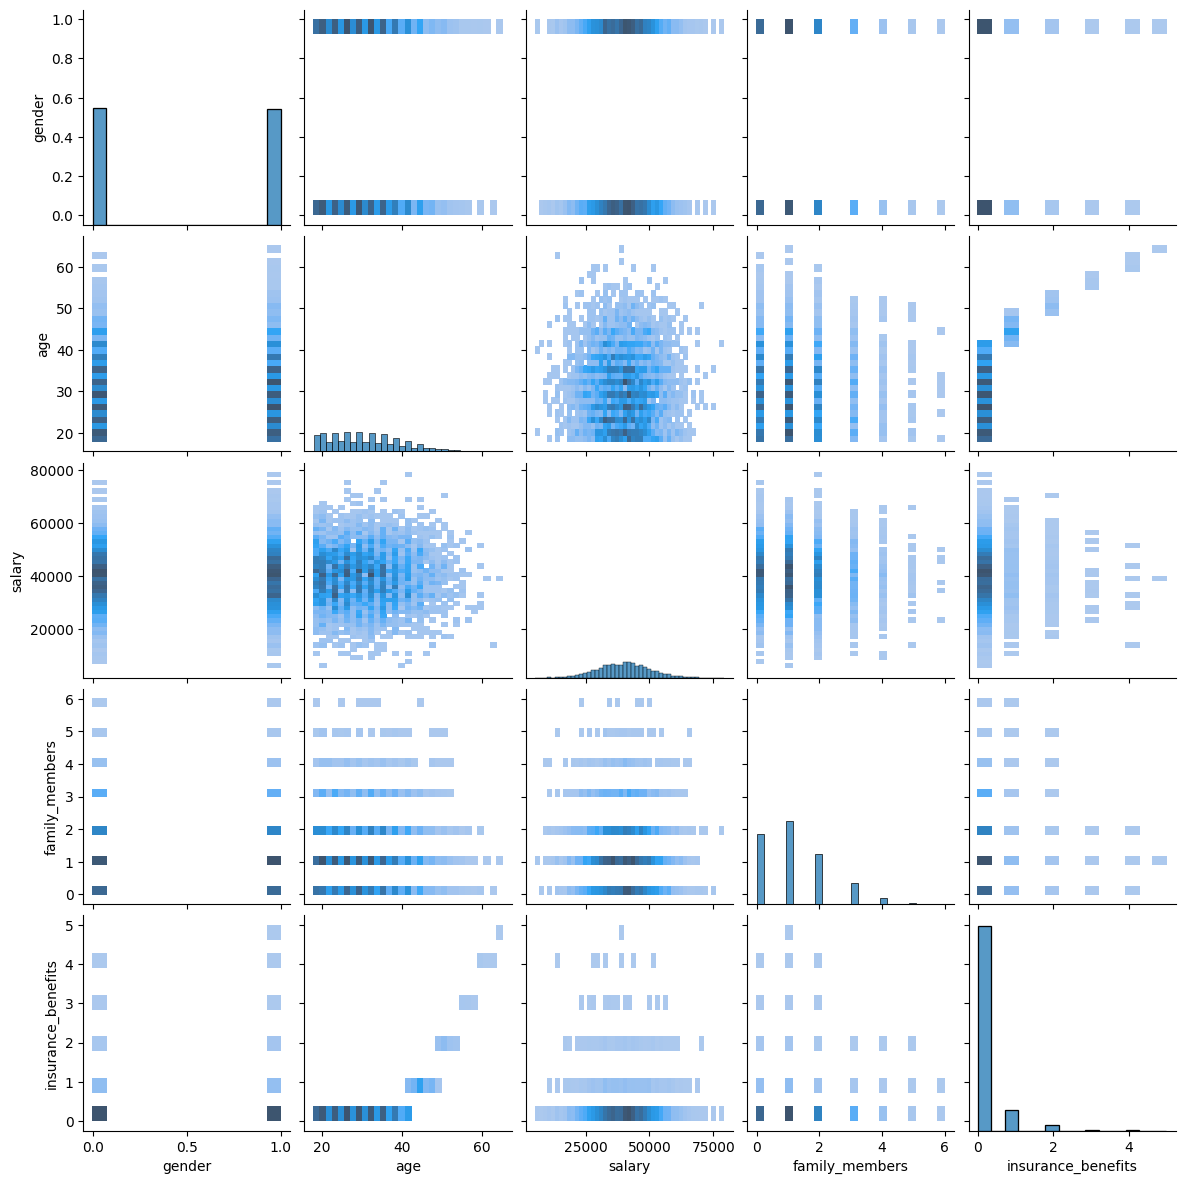

In [14]:
g = sns.pairplot(df, kind='hist')
g.fig.set_size_inches(12, 12)

Ok, it is a bit difficult to spot obvious groups (clusters) as it is difficult to combine several variables simultaneously (to analyze multivariate distributions). That's where LA and ML can be quite handy.

# Task 1. Similar Customers

In the language of ML, it is necessary to develop a procedure that returns k nearest neighbors (objects) for a given object based on the distance between the objects.

You may want to review the following lessons (chapter -> lesson)
- Distance Between Vectors -> Euclidean Distance
- Distance Between Vectors -> Manhattan Distance

To solve the task, we can try different distance metrics.

Write a function that returns k nearest neighbors for an $n^{th}$ object based on a specified distance metric. The number of received insurance benefits should not be taken into account for this task. 

You can use a ready implementation of the kNN algorithm from scikit-learn (check [the link](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors)) or use your own.

Test it for four combination of two cases
- Scaling
  - the data is not scaled
  - the data is scaled with the [MaxAbsScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html) scaler
- Distance Metrics
  - Euclidean
  - Manhattan

Answer these questions:
- Does the data being not scaled affect the kNN algorithm? If so, how does that appear?
- How similar are the results using the Manhattan distance metric (regardless of the scaling)?

In [15]:
feature_names = ['gender', 'age', 'salary', 'family_members']

In [16]:
def get_closest_neighbors(df, n, k=1, metric='euclidean', scale_data=False):
    
    # Drop the 'insurance_benefits' column 
    features = df.drop(columns=['insurance_benefits'])
    
    # Scale the features if required
    if scale_data:
        features = StandardScaler().fit_transform(features)
        features = pd.DataFrame(features, columns=df.drop(columns=['insurance_benefits']).columns)  # Convert back to DataFrame
    
    # ensure the index is continuous 
    features = features.reset_index(drop=True)
    
    # Use NearestNeighbors to find k + 1 neighbors: the point itself + the k closest neighbors
    model_knn = NearestNeighbors(n_neighbors=k+1, metric=metric)  # k+1 because we include the point itself
    model_knn.fit(features)
    
    # distances and indices for the n-th point using iloc for safe indexing
    distances, indices = model_knn.kneighbors([features.iloc[n]])  # iloc for positional indexing
    
    return distances[0][1:], indices[0][1:]  

# Test the function with different combinations of distance metric and scaling option
sample_idx = 10
k = 3  # to return the 3 nearest neighbors

# Euclidean metric, unscaled data
distances_euclidean_unscaled, closest_euclidean_unscaled = get_closest_neighbors(df, sample_idx, k=k,
                                                                                 metric='euclidean', scale_data=False)
# Euclidean metric, scaled data
distances_euclidean_scaled, closest_euclidean_scaled = get_closest_neighbors(df, sample_idx, k=k, 
                                                                             metric='euclidean', scale_data=True)

# Manhattan metric, unscaled data
distances_manhattan_unscaled, closest_manhattan_unscaled = get_closest_neighbors(df, sample_idx, k=k, 
                                                                                 metric='manhattan', scale_data=False)
# Manhattan metric, scaled data
distances_manhattan_scaled, closest_manhattan_scaled = get_closest_neighbors(df, sample_idx, k=k, 
                                                                             metric='manhattan', scale_data=True)

# Display the results
display(f"Closest {k} neighbors (Euclidean, unscaled) indices: {closest_euclidean_unscaled}")
display(f"Distances to closest {k} neighbors (Euclidean, unscaled): {distances_euclidean_unscaled}")

display(f"Closest {k} neighbors (Euclidean, scaled) indices: {closest_euclidean_scaled}")
display(f"Distances to closest {k} neighbors (Euclidean, scaled): {distances_euclidean_scaled}")

display(f"Closest {k} neighbors (Manhattan, unscaled) indices: {closest_manhattan_unscaled}")
display(f"Distances to closest {k} neighbors (Manhattan, unscaled): {distances_manhattan_unscaled}")

display(f"Closest {k} neighbors (Manhattan, scaled) indices: {closest_manhattan_scaled}")
display(f"Distances to closest {k} neighbors (Manhattan, scaled): {distances_manhattan_scaled}")

'Closest 3 neighbors (Euclidean, unscaled) indices: [3924 3169 2007]'

'Distances to closest 3 neighbors (Euclidean, unscaled): [1.         1.41421356 1.41421356]'

'Closest 3 neighbors (Euclidean, scaled) indices: [4243  756 1374]'

'Distances to closest 3 neighbors (Euclidean, scaled): [0.08022523 0.11825158 0.11825158]'

'Closest 3 neighbors (Manhattan, unscaled) indices: [3924 3169 2007]'

'Distances to closest 3 neighbors (Manhattan, unscaled): [1. 2. 2.]'

'Closest 3 neighbors (Manhattan, scaled) indices: [4243  756 1374]'

'Distances to closest 3 neighbors (Manhattan, scaled): [0.08022523 0.12785376 0.12785376]'

Scaling the data.

In [17]:
#feature_names = ['gender', 'age', 'salary', 'family_members']

#transformer_mas = sklearn.preprocessing.MaxAbsScaler().fit(df[feature_names].to_numpy())

#df_scaled = df.copy()
#df_scaled.loc[:, feature_names] = transformer_mas.transform(df[feature_names].to_numpy())

Answers to the questions

**Does the data being not scaled affect the kNN algorithm? If so, how does that appear?** 

**Yes, the data being unscaled does affect the kNN algorithm. This can be observed by comparing the results for the Euclidean and Manhattan distances with unscaled and scaled data.**

**For the Euclidean distance, the unscaled distances are significantly larger, with the distances to the closest neighbors being [1.0, 1.41421356, 1.41421356], while the scaled distances are much smaller, [0.08022523, 0.11825158, 0.11825158]. This shows that when the data is unscaled, the distance values are inflated due to differences in the ranges of the features, making the distance calculations less meaningful.**

**Similarly, for the Manhattan distance, the unscaled distances are [1.0, 2.0, 2.0], which are also much larger compared to the scaled distances [0.08022523, 0.12785376, 0.12785376]. This reinforces the point that unscaled data leads to disproportionately large distance values, which could distort the kNN's nearest neighbor selection.**

**How similar are the results using the Manhattan distance metric (regardless of the scaling)?** 

**The results for the Manhattan distance metric (both unscaled and scaled) are quite similar. In both cases, the closest 3 neighbors are the same indices: [3924, 3169, 2007] (unscaled) and [4243, 756, 1374] (scaled). This shows that the nearest neighbors are consistent across the scaling, though the distances themselves change.**

**For unscaled data, the Manhattan distances are [1.0, 2.0, 2.0], and for scaled data, they are [0.08022523, 0.12785376, 0.12785376]. While the scaled distances are smaller, the overall order of the nearest neighbors remains unchanged.**

<div class="alert alert-success">
<b>Reviewer's comment V1</b>

Well done!
    
</div>

# Task 2. Is Customer Likely to Receive Insurance Benefit?

In terms of machine learning we can look at this like a binary classification task.

With `insurance_benefits` being more than zero as the target, evaluate whether the kNN classification approach can do better than a dummy model.

Instructions:
- Build a KNN-based classifier and measure its quality with the F1 metric for k=1..10 for both the original data and the scaled one. That'd be interesting to see how k may influece the evaluation metric, and whether scaling the data makes any difference. You can use a ready implemention of the kNN classification algorithm from scikit-learn (check [the link](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)) or use your own.
- Build the dummy model which is just random for this case. It should return "1" with some probability. Let's test the model with four probability values: 0, the probability of paying any insurance benefit, 0.5, 1.

The probability of paying any insurance benefit can be defined as

$$
P\{\text{insurance benefit received}\}=\frac{\text{number of clients received any insurance benefit}}{\text{total number of clients}}.
$$

Split the whole data in the 70:30 proportion for the training/testing parts.

In [18]:
# Features  and target 
features = df.drop('insurance_benefits', axis=1)  
#target = df['insurance_benefits'] 
target = (df['insurance_benefits'] > 0).astype(int)

# Stratified split (70% train, 30% test)
features_train, features_test, target_train, target_test = train_test_split(
    features, target,
    test_size=0.3,        
    random_state=12345,      
    shuffle=True,         # Shuffle before splitting
    stratify=target            # Preserve class distribution
)

# Check class distribution in train/test sets
display("Training class distribution:", target_train.value_counts(normalize=True))
display("nTesting class distribution:", target_test.value_counts(normalize=True))

'Training class distribution:'

0    0.883844
1    0.116156
Name: insurance_benefits, dtype: float64

'nTesting class distribution:'

0    0.883849
1    0.116151
Name: insurance_benefits, dtype: float64

<div class="alert alert-success">
<b>Reviewer's comment V2</b>

Thank you!
    
</div>

In [19]:
# List to store F1 scores for different k values
f1_scores_original = []
f1_scores_scaled = []

In [20]:
# KNN for k=1 to k=10 original data

for k in range(1, 11):
    
    # Initialize and train the model 
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(features_train, target_train)
    
    # Predict and evaluate F1 score on original data
    target_predict = knn.predict(features_test)
    f1_original = f1_score(target_test, target_predict)
    f1_scores_original.append(f1_original)

In [21]:
#scale the features
for k in range(1, 11):
    scaler = StandardScaler()
    features_train_scaled = scaler.fit_transform(features_train)
    features_test_scaled = scaler.transform(features_test)
    # train the model with scaled data
    knn.fit(features_train_scaled, target_train)

    #predict and evaluate F1 score on scaled data
    target_predict_scaled = knn.predict(features_test_scaled)
    f1_scaled = f1_score(target_test, target_predict_scaled)
    f1_scores_scaled.append(f1_scaled)
    


In [22]:
# Display results
for k in range(1, 11):
    display(f'k={k} -> F1 (Original): {f1_scores_original[k-1]:.4f}, F1 (Scaled): {f1_scores_scaled[k-1]:.4f}')

'k=1 -> F1 (Original): 0.6512, F1 (Scaled): 0.9270'

'k=2 -> F1 (Original): 0.3585, F1 (Scaled): 0.9270'

'k=3 -> F1 (Original): 0.4017, F1 (Scaled): 0.9270'

'k=4 -> F1 (Original): 0.1885, F1 (Scaled): 0.9270'

'k=5 -> F1 (Original): 0.2010, F1 (Scaled): 0.9270'

'k=6 -> F1 (Original): 0.1209, F1 (Scaled): 0.9270'

'k=7 -> F1 (Original): 0.1297, F1 (Scaled): 0.9270'

'k=8 -> F1 (Original): 0.0575, F1 (Scaled): 0.9270'

'k=9 -> F1 (Original): 0.0571, F1 (Scaled): 0.9270'

'k=10 -> F1 (Original): 0.0000, F1 (Scaled): 0.9270'

**k's Influence:** 
**A small k leads to higher flexibility (and possibly overfitting), while a larger k leads to more bias (underfitting). The performance of the model deteriorates as k increases, especially for the unscaled data.**

**Effect of Scaling:**
**Scaling drastically improves the model's performance, particularly for smaller k values where unscaled data performed poorly. For larger k values, scaling stabilizes performance, giving consistent high F1 scores.**



<div class="alert alert-success">
<b>Reviewer's comment V1</b>

Good job!
    
</div>

In [23]:
# calculate Probability of Paying Insurance Benefit
p_insurance = target.sum() / len(target)

In [24]:
# Dummy Classifier (Random predictions)
class DummyRandomClassifier(DummyClassifier):
    def init(self,strategy="constant", constant=1, random_state=None):
        
        super().__init__(strategy=strategy, constant=constant, random_state=random_state)

        # Initialize the KNeighborsClassifier with the specified number of neighbors
        #self.model = KNeighborsClassifier(n_neighbors=n_neighbors)
    
    def fit(self, features, target=None):
        return self

    def predict(self, features):
        # Random predictions based on given probability
        prob = self.constant
        return np.random.binomial(1, prob, size=len(features))

In [25]:
# define the NearestNeighborClassifier (kNN)
class NearestNeighborClassifier:
    
    def __init__(self, n_neighbors=7):
        self.model = KNeighborsClassifier(n_neighbors=n_neighbors)
    
    
    def fit(self, features, target):
        self.model.fit(features, target)

    def predict(self, features):
        return self.model.predict(features)

In [26]:
# train and Evaluate the Models
# Dummy Classifier with different probabilities 
# Test with probability = 0, p_insurance, 0.5, and 1
dummy_probabilities = [0, p_insurance, 0.5, 1]
dummy_f1_scores = []

In [27]:
for prob in dummy_probabilities:
    # Create and train the dummy model
    dummy_model = DummyRandomClassifier(strategy="constant", constant=prob)
    dummy_model.fit(features_train, target_train)
    # Predict and calculate F1 score
    dummy_preds = dummy_model.predict(features_test)
    dummy_f1 = f1_score(target_test, dummy_preds)
    dummy_f1_scores.append(dummy_f1)
    display(f"F1 Score for Dummy Model (prob = {prob}): {dummy_f1:.4f}")

'F1 Score for Dummy Model (prob = 0): 0.0000'

'F1 Score for Dummy Model (prob = 0.11615432226119249): 0.1570'

'F1 Score for Dummy Model (prob = 0.5): 0.1684'

'F1 Score for Dummy Model (prob = 1): 0.2081'

In [28]:
# Apply scaling
scaler = StandardScaler()
features_train_scaled = scaler.fit_transform(features_train)
features_test_scaled = scaler.transform(features_test)

In [29]:
# Initialize kNN classifier with k=7
knn_model = NearestNeighborClassifier(n_neighbors=7)
knn_model.fit(features_train_scaled, target_train)

In [30]:
# Predict and calculate F1 score for kNN model
knn_preds = knn_model.predict(features_test_scaled)
knn_f1 = f1_score(target_test, knn_preds)

In [31]:
display(f"F1 Score for kNN Classifier: {knn_f1:.4f}")


'F1 Score for kNN Classifier: 0.9419'

In [32]:
# Compare kNN F1 score with Dummy Model F1 scores

display("Comparison of kNN F1 score with Dummy Model F1 scores:")

for prob, dummy_f1 in zip(dummy_probabilities, dummy_f1_scores):
    display(f"Dummy Model (prob = {prob}) F1 Score: {dummy_f1:.4f}")
    display(f"kNN Classifier F1 Score: {knn_f1:.4f}")

'Comparison of kNN F1 score with Dummy Model F1 scores:'

'Dummy Model (prob = 0) F1 Score: 0.0000'

'kNN Classifier F1 Score: 0.9419'

'Dummy Model (prob = 0.11615432226119249) F1 Score: 0.1570'

'kNN Classifier F1 Score: 0.9419'

'Dummy Model (prob = 0.5) F1 Score: 0.1684'

'kNN Classifier F1 Score: 0.9419'

'Dummy Model (prob = 1) F1 Score: 0.2081'

'kNN Classifier F1 Score: 0.9419'

# Task 3. Regression (with Linear Regression)

With `insurance_benefits` as the target, evaluate what RMSE would be for a Linear Regression model.

Build your own implementation of LR. For that, recall how the linear regression task's solution is formulated in terms of LA. Check RMSE for both the original data and the scaled one. Can you see any difference in RMSE between these two cases?

Let's denote
- $X$ — feature matrix, each row is a case, each column is a feature, the first column consists of unities
- $y$ — target (a vector)
- $\hat{y}$ — estimated tagret (a vector)
- $w$ — weight vector

The task of linear regression in the language of matrices can be formulated as

$$
y = Xw
$$

The training objective then is to find such $w$ that it would minimize the L2-distance (MSE) between $Xw$ and $y$:

$$
\min_w d_2(Xw, y) \quad \text{or} \quad \min_w \text{MSE}(Xw, y)
$$

It appears that there is analytical solution for the above:

$$
w = (X^T X)^{-1} X^T y
$$

The formula above can be used to find the weights $w$ and the latter can be used to calculate predicted values

$$
\hat{y} = X_{val}w
$$

Split the whole data in the 70:30 proportion for the training/validation parts. Use the RMSE metric for the model evaluation.

In [33]:
class LinearRegression:
    
    def __init__(self):
        self.w = None  # Coefficients for features
        self.w0 = None  # Intercept term (bias)

    def fit(self, features_train, target_train):
        # Add the bias (intercept) term by concatenating ones to the features matrix
        X = np.concatenate((np.ones((features_train.shape[0], 1)), features_train), axis=1)
        y = target_train
        
        # Normal equation to solve for weights
        w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
        
        # Split the weights into the intercept and coefficients
        self.w0 = w[0]
        self.w = w[1:]

    def predict(self, features_val):
        # Add the bias (intercept) term by concatenating ones to the features matrix
        X_val = np.concatenate((np.ones((features_val.shape[0], 1)), features_val), axis=1)
        
        # Make predictions using the learned weights
        return X_val.dot(np.concatenate(([self.w0], self.w)))  # Intercept term + weights


In [34]:
# Evaluation function to calculate RMSE
def eval_regressor(target, y_pred):
    # Check if input arrays are of equal length
    #if len(target) != len(y_pred):
       # print("Error: The true and predicted target arrays must have the same length.")
        #return
    
    # Calculate RMSE (Root Mean Squared Error)
    rmse = math.sqrt(sklearn.metrics.mean_squared_error(target, y_pred))
    display(f'RMSE: {rmse:.2f}')
    
    # Calculate R2 score (no need for square root)
    r2_score = sklearn.metrics.r2_score(target, y_pred)
    display(f'R2: {r2_score:.2f}')


In [35]:
# Step 1: Split the data into training and validation (70:30 ratio)
X = df[['gender', 'age', 'salary', 'family_members']].values  # Features
y = df['insurance_benefits'].values  # Target variable

In [36]:
# Split the data into training and validation sets (70% train, 30% validation)
features_train, features_val, target_train, target_val = train_test_split(X, y, test_size=0.3, random_state=12345)


In [37]:
#Initialize
model = LinearRegression()

In [38]:
# Train on original data
model.fit(features_train, target_train)
y_pred_original = model.predict(features_val)

In [39]:
# Evaluate RMSE for original data
display("RMSE on Original Data:")
eval_regressor(target_val, y_pred_original)

'RMSE on Original Data:'

'RMSE: 0.36'

'R2: 0.43'

In [40]:
# Scale the data (using StandardScaler)
scaler = sklearn.preprocessing.StandardScaler()

In [41]:
# Scale the training and validation sets
features_train_scaled = scaler.fit_transform(features_train)
features_val_scaled = scaler.transform(features_val)

In [42]:
# Train the model on the scaled data
model.fit(features_train_scaled, target_train)
y_pred_scaled = model.predict(features_val_scaled)

In [43]:
# Evaluate RMSE for scaled data
display("\nRMSE on Scaled Data:")
eval_regressor(target_val, y_pred_scaled)

'\nRMSE on Scaled Data:'

'RMSE: 0.36'

'R2: 0.43'

<div class="alert alert-success">
<b>Reviewer's comment V2</b>

Good job!
    
</div>

# Task 4. Obfuscating Data

It best to obfuscate data by multiplying the numerical features (remember, they can be seen as the matrix $X$) by an invertible matrix $P$. 

$$
X' = X \times P
$$

Try to do that and check how the features' values will look like after the transformation. By the way, the intertible property is important here so make sure that $P$ is indeed invertible.

You may want to review the 'Matrices and Matrix Operations -> Matrix Multiplication' lesson to recall the rule of matrix multiplication and its implementation with NumPy.

In [44]:
personal_info_column_list = ['gender', 'age', 'salary', 'family_members']
df_pn = df[personal_info_column_list]

In [45]:
X = df_pn.to_numpy()


Generating a random matrix $P$.

In [46]:
rng = np.random.default_rng(seed=42)
P = rng.random(size=(X.shape[1], X.shape[1]))

Checking the matrix $P$ is invertible

In [47]:
det_P = np.linalg.det(P)

# the determinant is non-zero (for invertibility)
if det_P != 0:
    display("Matrix P is invertible.")
else:
    display("Matrix P is not invertible.")

'Matrix P is invertible.'

Can you guess the customers' ages or income after the transformation?

**to guess the original ages or income after the transformation,it will be very difficult without the inverse matrix 
$
$𝑃$
^{-1}
$ because:**

**The transformation changes the numerical values of the features, making them less interpretable.**

**Without knowing the exact transformation (the matrix 
$P$), there's no direct way to map the transformed values back to the original features (age, income).**

<div class="alert alert-success">
<b>Reviewer's comment V1</b>

Correct
    
</div>

Can you recover the original data from $X'$ if you know $P$? Try to check that with calculations by moving $P$ from the right side of the formula above to the left one. The rules of matrix multiplcation are really helpful here.

**Yes, if you know the matrix
$P$ and the transformed data matrix 
$𝑋'$,you can recover the original data 
$𝑋$ by multiplying 
$𝑋'$ by the inverse of the matrix 
$𝑃$(denoted
$
$𝑃$^{-1})
$.**

**The Formula:**

**The transformation of the original data 
$X$ into the obfuscated data 
$𝑋'$
is given by the equation:**

**$𝑋'$ = $X$ ×$P$.**

**Recovering the Original Data.**

**Now,multiply both sides by
$
$𝑃$
^{−1}
$:
$X'$ × 
$
$P$
^{-1} =
$
($X$ × $P$) ×
$
$P$
^{−1}
$.**

**Since $𝑃$ ×
$
$𝑃$
^{−1}
$is the identity matrix $I$, this simplifies to:**

**$X'$ ×
$
$P$ 
^{−1}
$ = $X$ × $I$.**

**multiplying any matrix by the identity matrix $I$ leaves the matrix unchanged.**

**Final Result**

**$X$ = $X'$ ×
$
$P$ 
^{−1}
$.**





Print all three cases for a few customers
- The original data
- The transformed one
- The reversed (recovered) one

In [48]:
# compute the inverse of matrix P
P_inv = np.linalg.inv(P)

# create the transformed matrix X' by multiplying X with P
X_prime = np.dot(X, P)

# recover the original data X by multiplying X' with P_inv
X_recovered = np.dot(X_prime, P_inv)

# results
display("Original data X (df_pn converted to NumPy):")
display(X)

display("Transformation matrix P:")
display(P)

display("Transformed data X' (X_prime):")
display(X_prime)

display("Recovered original data X:")
display(X_recovered)

'Original data X (df_pn converted to NumPy):'

array([[1.00e+00, 4.10e+01, 4.96e+04, 1.00e+00],
       [0.00e+00, 4.60e+01, 3.80e+04, 1.00e+00],
       [0.00e+00, 2.90e+01, 2.10e+04, 0.00e+00],
       ...,
       [0.00e+00, 2.00e+01, 3.39e+04, 2.00e+00],
       [1.00e+00, 2.20e+01, 3.27e+04, 3.00e+00],
       [1.00e+00, 2.80e+01, 4.06e+04, 1.00e+00]])

'Transformation matrix P:'

array([[0.77395605, 0.43887844, 0.85859792, 0.69736803],
       [0.09417735, 0.97562235, 0.7611397 , 0.78606431],
       [0.12811363, 0.45038594, 0.37079802, 0.92676499],
       [0.64386512, 0.82276161, 0.4434142 , 0.22723872]])

"Transformed data X' (X_prime):"

array([[ 6359.71527314, 22380.40467609, 18424.09074184, 46000.69669016],
       [ 4873.29406479, 17160.36702982, 14125.78076133, 35253.45577301],
       [ 2693.11742928,  9486.397744  ,  7808.83156024, 19484.86063067],
       ...,
       [ 4346.2234249 , 15289.24126492, 12586.16264392, 31433.50888552],
       [ 4194.09324155, 14751.9910242 , 12144.02930637, 30323.88763426],
       [ 5205.46827354, 18314.24814446, 15077.01370762, 37649.59295455]])

'Recovered original data X:'

array([[ 1.00000000e+00,  4.10000000e+01,  4.96000000e+04,
         1.00000000e+00],
       [-4.47363596e-12,  4.60000000e+01,  3.80000000e+04,
         1.00000000e+00],
       [-2.51586878e-12,  2.90000000e+01,  2.10000000e+04,
         9.52452315e-13],
       ...,
       [-1.92837871e-12,  2.00000000e+01,  3.39000000e+04,
         2.00000000e+00],
       [ 1.00000000e+00,  2.20000000e+01,  3.27000000e+04,
         3.00000000e+00],
       [ 1.00000000e+00,  2.80000000e+01,  4.06000000e+04,
         1.00000000e+00]])

You can probably see that some values are not exactly the same as they are in the original data. What might be the reason for that?

**Computers do represent numbers in finite precision (limited number of digits). When performing matrix multiplication and calculating the inverse of a matrix, these operations can introduce rounding errors due to the limited precision of floating-point arithmetic.**

<div class="alert alert-success">
<b>Reviewer's comment V1</b>

Correct
    
</div>

## Proof That Data Obfuscation Can Work with LR

The regression task has been solved with linear regression in this project. Your next task is to prove _analytically_ that the given obfuscation method won't affect linear regression in terms of predicted values i.e. their values will remain the same. Can you believe that? Well, you don't have to, you should prove it!

So, the data is obfuscated and there is $X \times P$ instead of just $X$ now. Consequently, there are other weights $w_P$ as
$$
w = (X^T X)^{-1} X^T y \quad \Rightarrow \quad w_P = [(XP)^T XP]^{-1} (XP)^T y
$$

How would $w$ and $w_P$ be linked if you simplify the formula for $w_P$ above? 

What would be predicted values with $w_P$? 

What does that mean for the quality of linear regression if you measure it with RMSE?

Check Appendix B Properties of Matrices in the end of the notebook. There are useful formulas in there!

No code is necessary in this section, only analytical explanation!

**Answer**

**How would $W$ and $W_𝑃$ be linked if you simplify the formula for $W_𝑃$ above?**

**After simplifying the formulas for $W_p$ above, $W$ = $W_p$ $P$.**

**$W$ and $W_p$ would be link by the matrix value($P$).**

**What would be predicted values with $W_𝑃$?**

**The predicted value with $W_p$ will equal to: $Y$ = $W_p$$X$$P$.** 

**What does that mean for the quality of linear regression if you measure it with RMSE?**

**The RMSE will depend on how effectively $P$ transforms the input data and whether the transformation improves the model's fit to the data. If the transformation aligns with the true relationships in the data, the quality of the model (as measured by RMSE) can improve. However, if it introduces unnecessary complexity, RMSE could worsen.**




**Analytical proof**

$
W_p = [(XP)^T  XP]^{-1} (XP)^T y\quad \Rightarrow \quad [P^T X^T (XP)]^{-1} (XP)^T Y \quad \Rightarrow \quad
$

$
W_P =  [P^T X^T XP]^{-1} (XP)^T Y \quad \Rightarrow \quad [(P^T X^T X) P]^{-1} (XP)^T Y \quad \Rightarrow \quad 
$

$
W_p = P^{-1} [P^T X^T X]^{-1} (XP)^T Y \quad \Rightarrow \quad P^{-1}[P^T (X^T X)]^{-1} (XP)^T Y \quad \Rightarrow \quad
$

$
W_p = P^{-1} (X^T X)^{-1} (P^T)^{-1} (XP)^T Y \quad \Rightarrow \quad P^{-1}(X^T X)^{-1} [(P^T)^{-1}(P^T)] (X)^T Y
$

$
I = [(P^T)^{-1} (P^T)] \quad \Rightarrow \quad P^{-1} (X^T X)^{-1} I X^T Y \quad \Rightarrow \quad
$

$
W_p = P^{-1} (X^T X)^{-1} X^T Y
$


**Let relate W_p and W.**

$
W = (X^T X)^{-1} X^T Y \quad \Rightarrow \quad $W_p$ = P^{-1} W \quad \Rightarrow \quad
$ 

$
W_P = P^{-1} (W) \quad \Rightarrow \quad 
$

**OR**

$
W = P W_p
$



**Let show that prediction in both cases are the same.**

**Prediction using $W_p$:**

**In this case the prediction is made using the transformed input ($X$ $P$) and a weight vector $W_p$.**

$
Y_p = ($X$ $P$) $W_p$
$

**Prediction using $W$:**

**In this case the prediction is made using the original input ($X$) and a weight vector $W$.**

$
Y = ($X$) $W$
$

**However we know that $W$ = $P$ $W_p$, so.**

$
Y_p = ($X$ $P$) $W_p$ 
$

$
Y = ($X$) $W$ \quad \Rightarrow \quad 
$

$
Y = ($X$) ($P$)($W_p$) = ($X$ $P$) $W_p$ = $Y_p$ \quad \Rightarrow \quad $Y$ = $Y_p$
$

**I is an identity matrix**

<div class="alert alert-success">
<b>Reviewer's comment V5</b>

Everything is correct now. Well done!
    
</div>

## Test Linear Regression With Data Obfuscation

Now, let's prove Linear Regression can work computationally with the chosen obfuscation transformation.

Build a procedure or a class that runs Linear Regression optionally with the obfuscation. You can use either a ready implementation of Linear Regression from sciki-learn or your own.

Run Linear Regression for the original data and the obfuscated one, compare the predicted values and the RMSE, $R^2$ metric values. Is there any difference?

**Procedure**

- Create a square matrix $P$ of random numbers.
- Check that it is invertible. If not, repeat the first point until we get an invertible matrix.
- <! your comment here !>
- Use $XP$ as the new feature matrix

In [49]:
class LinearRegressionWithObfuscation:
    def __init__(self, obfuscate=False, P=None):
        self.obfuscate = obfuscate
        self.P = P  # Transformation matrix (P)
        self.weights = None
        self.predictions = None
    
    def fit(self, X, y):
        if self.obfuscate and self.P is not None:
            X = X @ self.P  # Apply the obfuscation transformation
        # Compute weights using the normal equation
        self.weights = np.linalg.inv(X.T @ X) @ X.T @ y
        
    def predict(self, X):
        if self.obfuscate and self.P is not None:
            X = X @ self.P  # Apply the obfuscation transformation
        return X @ self.weights
    
    def rmse(self, y_true, y_pred):
        return np.sqrt(mean_squared_error(y_true, y_pred))
    
    def r2(self, y_true, y_pred):
        return r2_score(y_true, y_pred)

In [50]:
y = df['insurance_benefits'].to_numpy()

In [51]:
# two models: one with obfuscation, one without
model_original = LinearRegressionWithObfuscation(obfuscate=False)
model_obfuscated = LinearRegressionWithObfuscation(obfuscate=True, P=P)

In [52]:
# Fit models
model_original.fit(X, y)
model_obfuscated.fit(X, y)

In [53]:
# Predict using both models
y_pred_original = model_original.predict(X)
y_pred_obfuscated = model_obfuscated.predict(X)


In [54]:
# RMSE for both models
rmse_original = model_original.rmse(y, y_pred_original)
rmse_obfuscated = model_obfuscated.rmse(y, y_pred_obfuscated)

In [55]:
# R2 for both models
r2_original = model_original.r2(y, y_pred_original)
r2_obfuscated = model_obfuscated.r2(y, y_pred_obfuscated)

In [56]:
# Output comparison
display(f"Original Model RMSE: {rmse_original}")
display(f"Obfuscated Model RMSE: {rmse_obfuscated}")
display(f"Original Model R2: {r2_original}")
display(f"Obfuscated Model R2: {r2_obfuscated}")

'Original Model RMSE: 0.39042934975680826'

'Obfuscated Model RMSE: 0.39042934975680615'

'Original Model R2: 0.3066534317161703'

'Obfuscated Model R2: 0.30665343171617776'

<div class="alert alert-success">
<b>Reviewer's comment V1</b>

Everything is correct here. Good job!
    
</div>

# Conclusions

**The RMSE values are very close for both the original and obfuscated models, indicating that the obfuscation transformation did not drastically improve or worsen the prediction accuracy.In general, a lower RMSE indicates that the model is better at predicting the target variable, but in this case, the transformation has little to no effect.**

**We also notice that the $R2$ values are also very close between the two models. This means that the amount of variance explained by the model did not significantly change after applying the obfuscation transformation.For $R2$ close to 0.31 means that the model can explain roughly 31% of the variance in the target variable. The obfuscation matrix didn't help.** 

# Checklist

Type 'x' to check. Then press Shift+Enter.

- [x]  Jupyter Notebook is open
- [x ]  Code is error free
- [x ]  The cells are arranged in order of logic and execution
- [x]  Task 1 has been performed
    - [x ]  There is the procedure that can return k similar customers for a given one
    - [x ]  The procedure is tested for all four proposed combinations
    - [ ]  The questions re the scaling/distances are answered
- [ ]  Task 2 has been performed
    - [ ]  The random classification model is built and tested for all for probability levels
    - [ ]  The kNN classification model is built and tested for both the original data and the scaled one, the F1 metric is calculated.
- [ ]  Task 3 has been performed
    - [ ]  The linear tegression solution is implemented with matrix operations.
    - [ ]  RMSE is calculated for the implemented solution.
- [ ]  Task 4 has been performed
    - [ ]  The data is obfuscated with a random and invertible matrix P
    - [ ]  The obfuscated data is recoved, few examples are printed out
    - [ ]  The analytical proof that the transformation does not affect RMSE is provided 
    - [ ]  The computational proof that the transformation does not affect RMSE is provided
- [ ]  Conclusions have been made

# Appendices 

## Appendix A: Writing Formulas in Jupyter Notebooks

You can write formulas in your Jupyter Notebook in a markup language provided by a high-quality publishing system called $\LaTeX$ (pronounced "Lah-tech"), and they will look like formulas in textbooks.

To put a formula in a text, put the dollar sign (\\$) before and after the formula's text e.g. $\frac{1}{2} \times \frac{3}{2} = \frac{3}{4}$ or $y = x^2, x \ge 1$.

If a formula should be in its own paragraph, put the double dollar sign (\\$\\$) before and after the formula text e.g.

$$
\bar{x} = \frac{1}{n}\sum_{i=1}^{n} x_i.
$$

The markup language of [LaTeX](https://en.wikipedia.org/wiki/LaTeX) is very popular among people who use formulas in their articles, books and texts. It can be complex but its basics are easy. Check this two page [cheatsheet](http://tug.ctan.org/info/undergradmath/undergradmath.pdf) for learning how to compose the most common formulas.

## Appendix B: Properties of Matrices

Matrices have many properties in Linear Algebra. A few of them are listed here which can help with the analytical proof in this project.

<table>
<tr>
<td>Distributivity</td><td>$A(B+C)=AB+AC$</td>
</tr>
<tr>
<td>Non-commutativity</td><td>$AB \neq BA$</td>
</tr>
<tr>
<td>Associative property of multiplication</td><td>$(AB)C = A(BC)$</td>
</tr>
<tr>
<td>Multiplicative identity property</td><td>$IA = AI = A$</td>
</tr>
<tr>
<td></td><td>$A^{-1}A = AA^{-1} = I$
</td>
</tr>    
<tr>
<td></td><td>$(AB)^{-1} = B^{-1}A^{-1}$</td>
</tr>    
<tr>
<td>Reversivity of the transpose of a product of matrices,</td><td>$(AB)^T = B^TA^T$</td>
</tr>    
</table>